# Run over clouds compute extremes and store them



### April 2021, JAH

In [40]:
#%matplotlib inline
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [41]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

#to_df = pd.DataFrame.from_records

In [42]:
import hipy.utils        as ut
import hipy.pltext       as pltext
#import hipy.histos       as histos

import clouds        as clouds
import pltclouds     as pltclouds

#import next.reco.chits    as chits
import next.reco.display  as nplay
import next.core.io       as nio
import next.core.city     as ncity

import next.reco.cloudsdia as cloudsdia
#import next.core.city     as ncity


In [43]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Thu Apr 22 18:03:47 2021


### load data

In [44]:
def get_clouds_filename(run_number):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/clouds_ds_{run_number}.h5'
    return filename

def get_clouds_df(fname):
    return pd.read_hdf(fname, 'clouds')    


In [45]:
run_number = 8182
fname      = get_clouds_filename(run_number)
dfclouds   = get_clouds_df(fname)
nevents    = len(dfclouds.groupby('event'))
print(fname)
print('len ', len(dfclouds), 'number of events ', nevents)

/home/hernando/data/NEW/clouds_ds_8182.h5
len  1899479 number of events  2760


In [46]:
ievts = [i for i, evt in dfclouds.groupby('event')]

In [47]:
print('total number of events ', len(ievts))

total number of events  2760


In [73]:
## bb: 2100, 2101, 2130, 2135
## b:  2108, 2115, 2134, 2140 
## 2-tracks: 2110
## ugly: 2102, 2103
## long: 2121
ii  = 2415
evt = dfclouds[dfclouds['event'] == ievts[ii]]

In [80]:
ana_extremes = lambda evt: cloudsdia.ana_extremes(evt, depth = 3)
res = ana_extremes(evt)
res

,id_ext,ene_ext,nsize_ext,x_ext,y_ext,z_ext,ecell_ext,nlength_ext,ipos_ext,idis_ext,i_ext,n_exts,ene_evt
0,193,0.694299,291,95.0,-115.0,453.535457,0.013760,1,0,0,0,2,1.572062
1,342,0.419293,165,105.0,-65.0,445.535457,0.016142,4,2,1,1,2,1.572062


{'cells': True, 'gradients': False, 'nodes': True, 'links': False, 'passes': False, 'segments': False, 'tracks': True, 'crests': True}


<IPython.core.display.Javascript object>


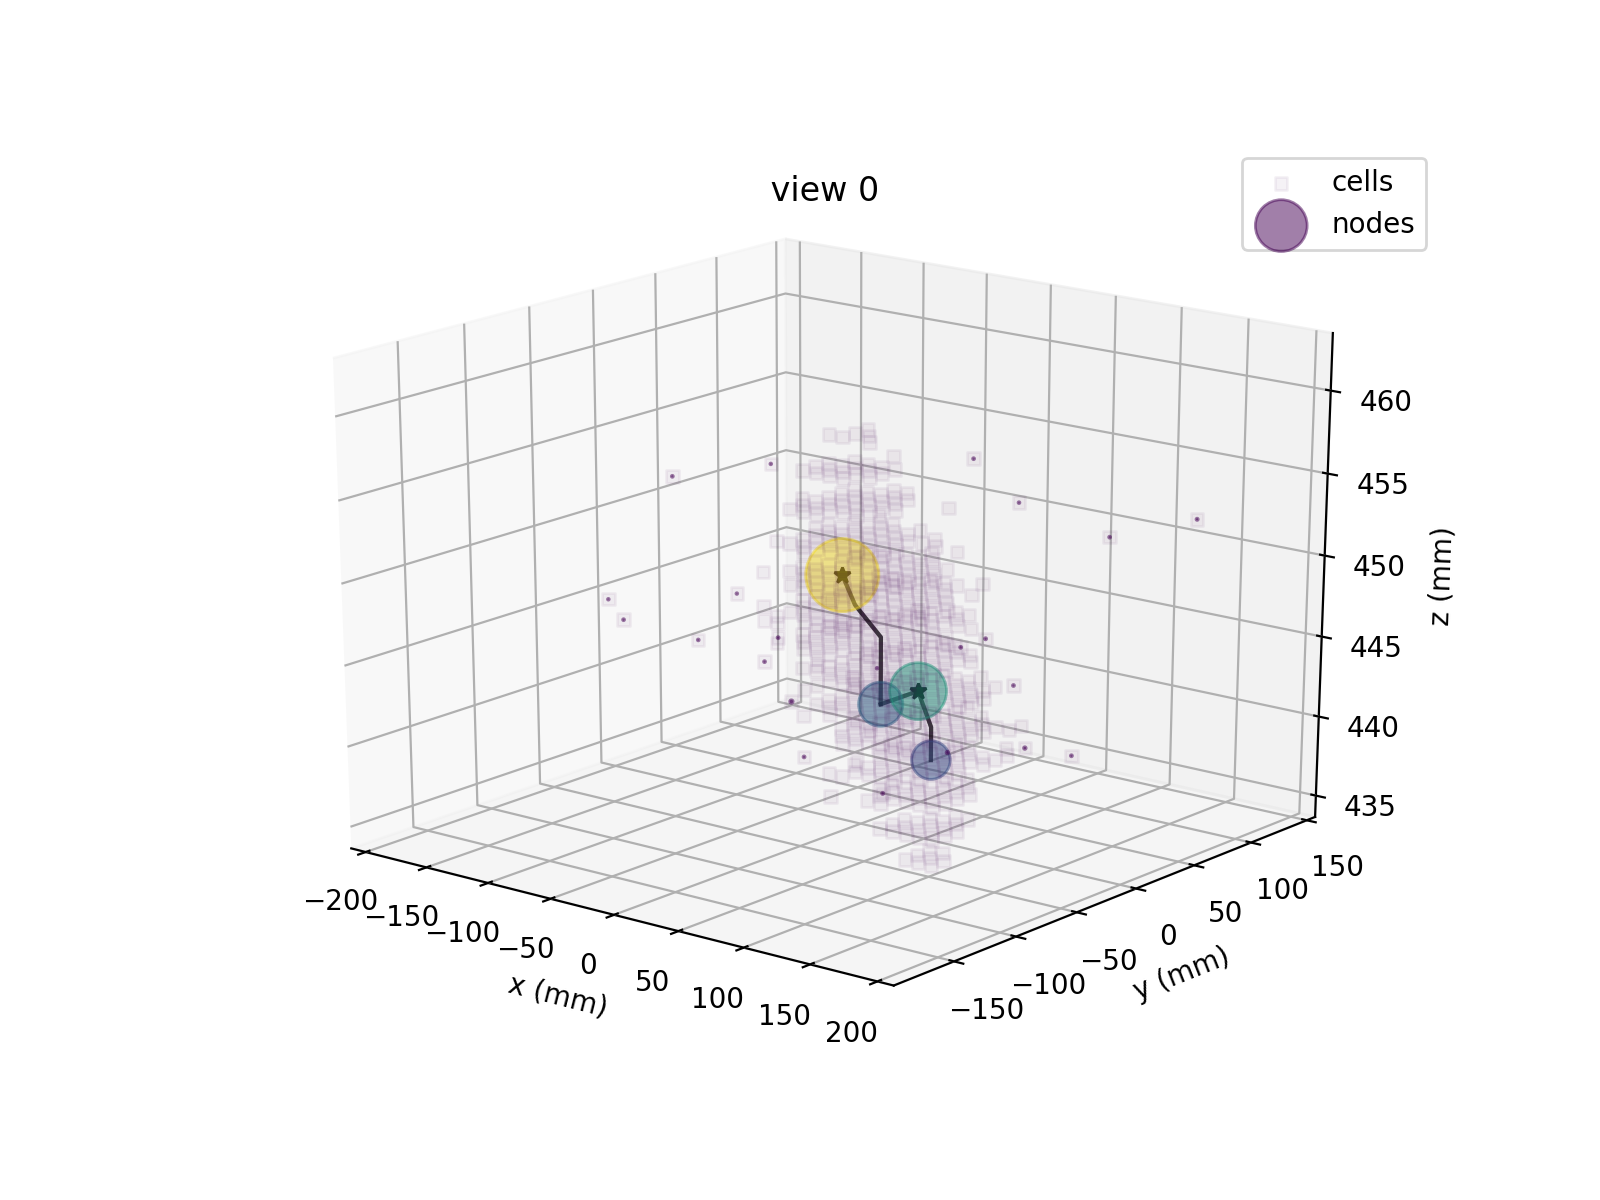

In [81]:
draw, plots = pltclouds.get_draw_clouds(evt)
plots['segments']  = False
plots['tracks'] = True
print(plots)
draw(plots)
plt.plot(res.x_ext, res.y_ext, res.z_ext, marker = '*', ls = ' ');

In [82]:
res = ncity.core_(dfclouds, ana_extremes)

trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
trim failure!
event  18926
event  

In [84]:
res

,id_ext,ene_ext,nsize_ext,x_ext,y_ext,z_ext,ecell_ext,nlength_ext,ipos_ext,idis_ext,ene_evt,i_ext,n_exts,event
0,0,0.000000,0,0.0,0.0,0.000000,0.000000,0,0,0,0.222145,0,0,311
1,0,0.000000,0,0.0,0.0,0.000000,0.000000,0,0,0,0.423277,0,0,316
2,0,0.000000,0,0.0,0.0,0.000000,0.000000,0,0,0,0.681489,0,0,317
3,0,0.000000,0,0.0,0.0,0.000000,0.000000,0,0,0,0.392559,0,0,324
4,0,0.000000,0,0.0,0.0,0.000000,0.000000,0,0,0,0.330227,0,0,326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,289,0.409838,121,95.0,25.0,224.949862,0.025041,1,0,1,1.706545,0,2,2621895
5407,518,0.216034,90,115.0,15.0,250.949862,0.010544,6,4,1,1.706545,1,2,2621895
5408,428,0.527803,177,145.0,5.0,172.598170,0.038819,1,0,0,1.667661,0,3,2623680
5409,268,0.292342,135,135.0,-55.0,152.598170,0.010547,4,2,1,1.667661,1,3,2623680


In [83]:
fname = f'/home/hernando/data/NEW/clouds_ana_{run_number}.h5'
res.to_hdf(fname, 'extremes.3')